## Predictive Model for Credit Cards Cilent default payments

## CPSC330 Project Blogpost

by @Aaron Liang(Lun Liang), UBC BCS 2020


## Project Background<br>
<br>
What’s this project about? This project uses dataset from UCI Machine Learning Repository, recording data information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
<br>The goal of our project is trying to build a predictive model based on selected indicators and try to reasonable predict whether the following or future credit card clients will default or not.


## Steps for Modeling

Generally speaking there are 3 steps for building a predictive model:
- EDA(Exploration Data Analysis)
- Feature Engineering
- Predictive Modeling

## 1.EDA

<br> With EDA (Exploratory data analysis), we can gain a general senses or even powerful insights related to the dataset instead of just predicting blindly. 
<br>The target variable in dataset is called default.payment.next.month .We can simply visualize the Next Month’s Default Payment percentages. check the following plot_1

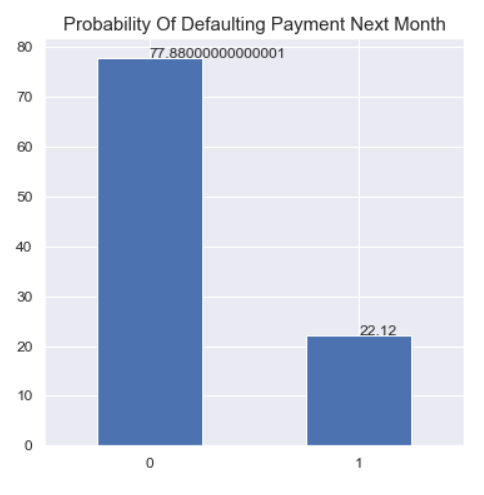

In [2]:
from IPython.display import Image

Image("plot_1.png")

It shows that generally about 78% clients are not expected to default payment, the other 22% were likely to be. 

We also made some general exploration on relationship between age, marriage and sex with the default payment posibility. See the plots below.

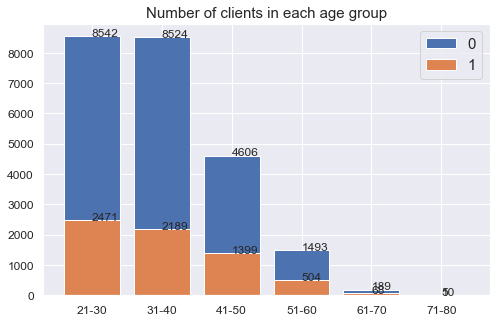

In [2]:
from IPython.display import Image

Image("plot_5.png")

with increasing age group the number of clients that will default the payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.

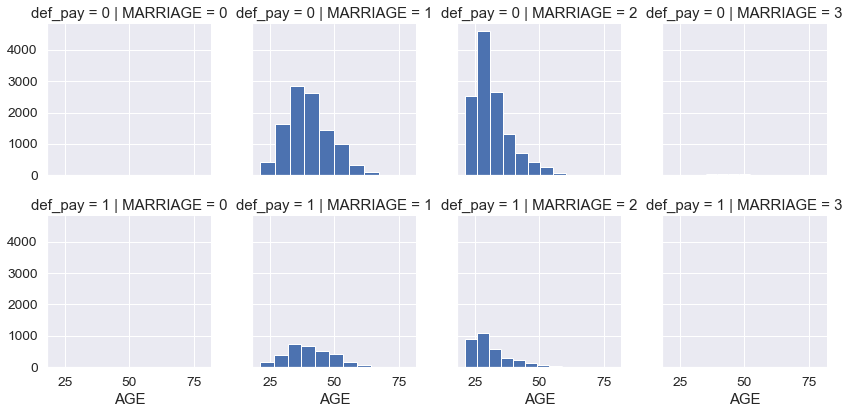

In [3]:
from IPython.display import Image

Image("plot_6.png")

married people aged 30-50 and unmarried customers aged 20-30 have a tendency to default, and unmarried customers have a higher probability of default.

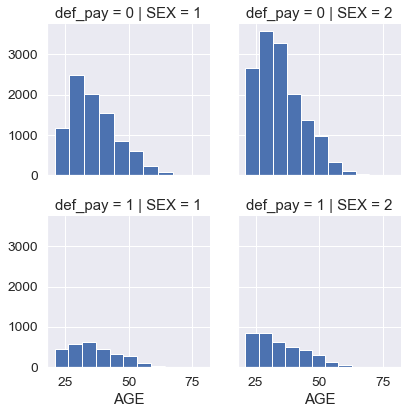

In [4]:
from IPython.display import Image

Image("plot_7.png")

It can be seen that in all age groups, women aged 20-30 have a higher tendency to default than men. We probably can keep the customer's SEX column to predict the probability of default.

## 2.Feature Engineering

For the predictive model, it is not that the more characteristic indicators, the more accurate and efficient the model will be. 
<br>
<br>Good features can more easily reflect the most relevant and important aspects of the problem and reduce the extra demand for more data collection. 
<br>
<br> Meanwhile the selecting steps of feature engineering can also reduce the quantities of irrelevant indicators to a certain extent and reduce the risk of overfitting. Overfitting means your predictive model using too many indicators and becomes redundant and complex. And it start encoding random quirks in the data, and Since then, the feasibility of popularizing your model on the new dataset has been greatly reduced.

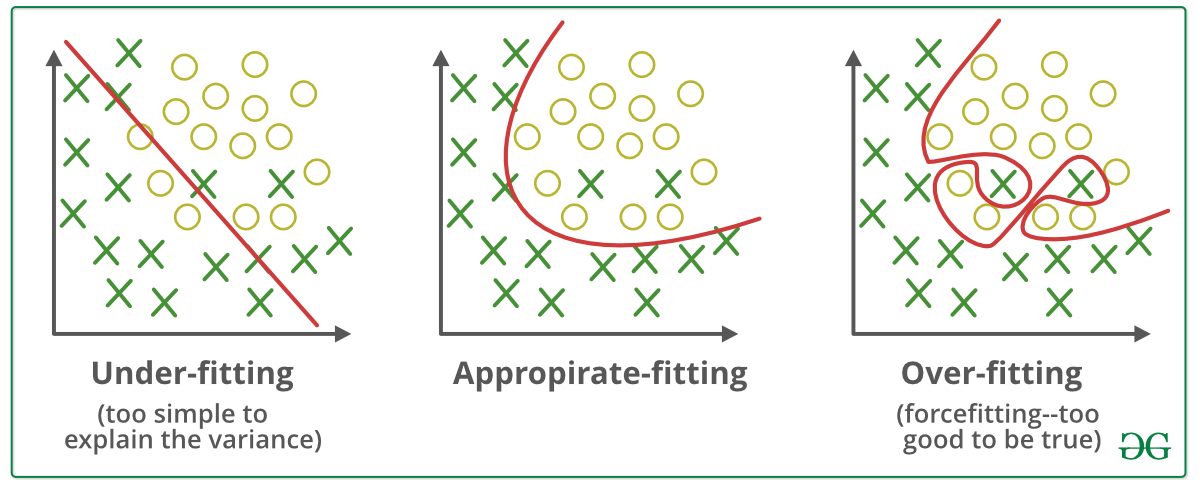

In [1]:
from IPython.display import Image

Image("plot_4.png")

See the explanation pictures above. The Over-fitting model used for distinguishing between circle and X becomes extremely weird. It's too specific for the particular dataset this time. But what if we introduce new point around? 

reference: https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/ 

## Checking features(variable) and correlation in this project

For sure even we used Feature Engineering, we still cannot gurantee that our predictive model to be perfect. Adding features increase the risk of overfitting and deleting features increase the risk of underfitting. This is a trade-off. To find the balance, we need to have insight of real scene because after all the data are from real life.



In this project, We definitely can have some appropriate assumption about the customers characters or behavior and their default possibility. They have indicators include sex, age, marriage, education status of clients( Some we have done the data exploration in EDA part), and the PAY_X, BILL_AMTX, PAY_AMTX variables more detailed records of their credit transactions. 

**Heatmap** will be a good choice to intuitively and roughly show the correlation between many variables.


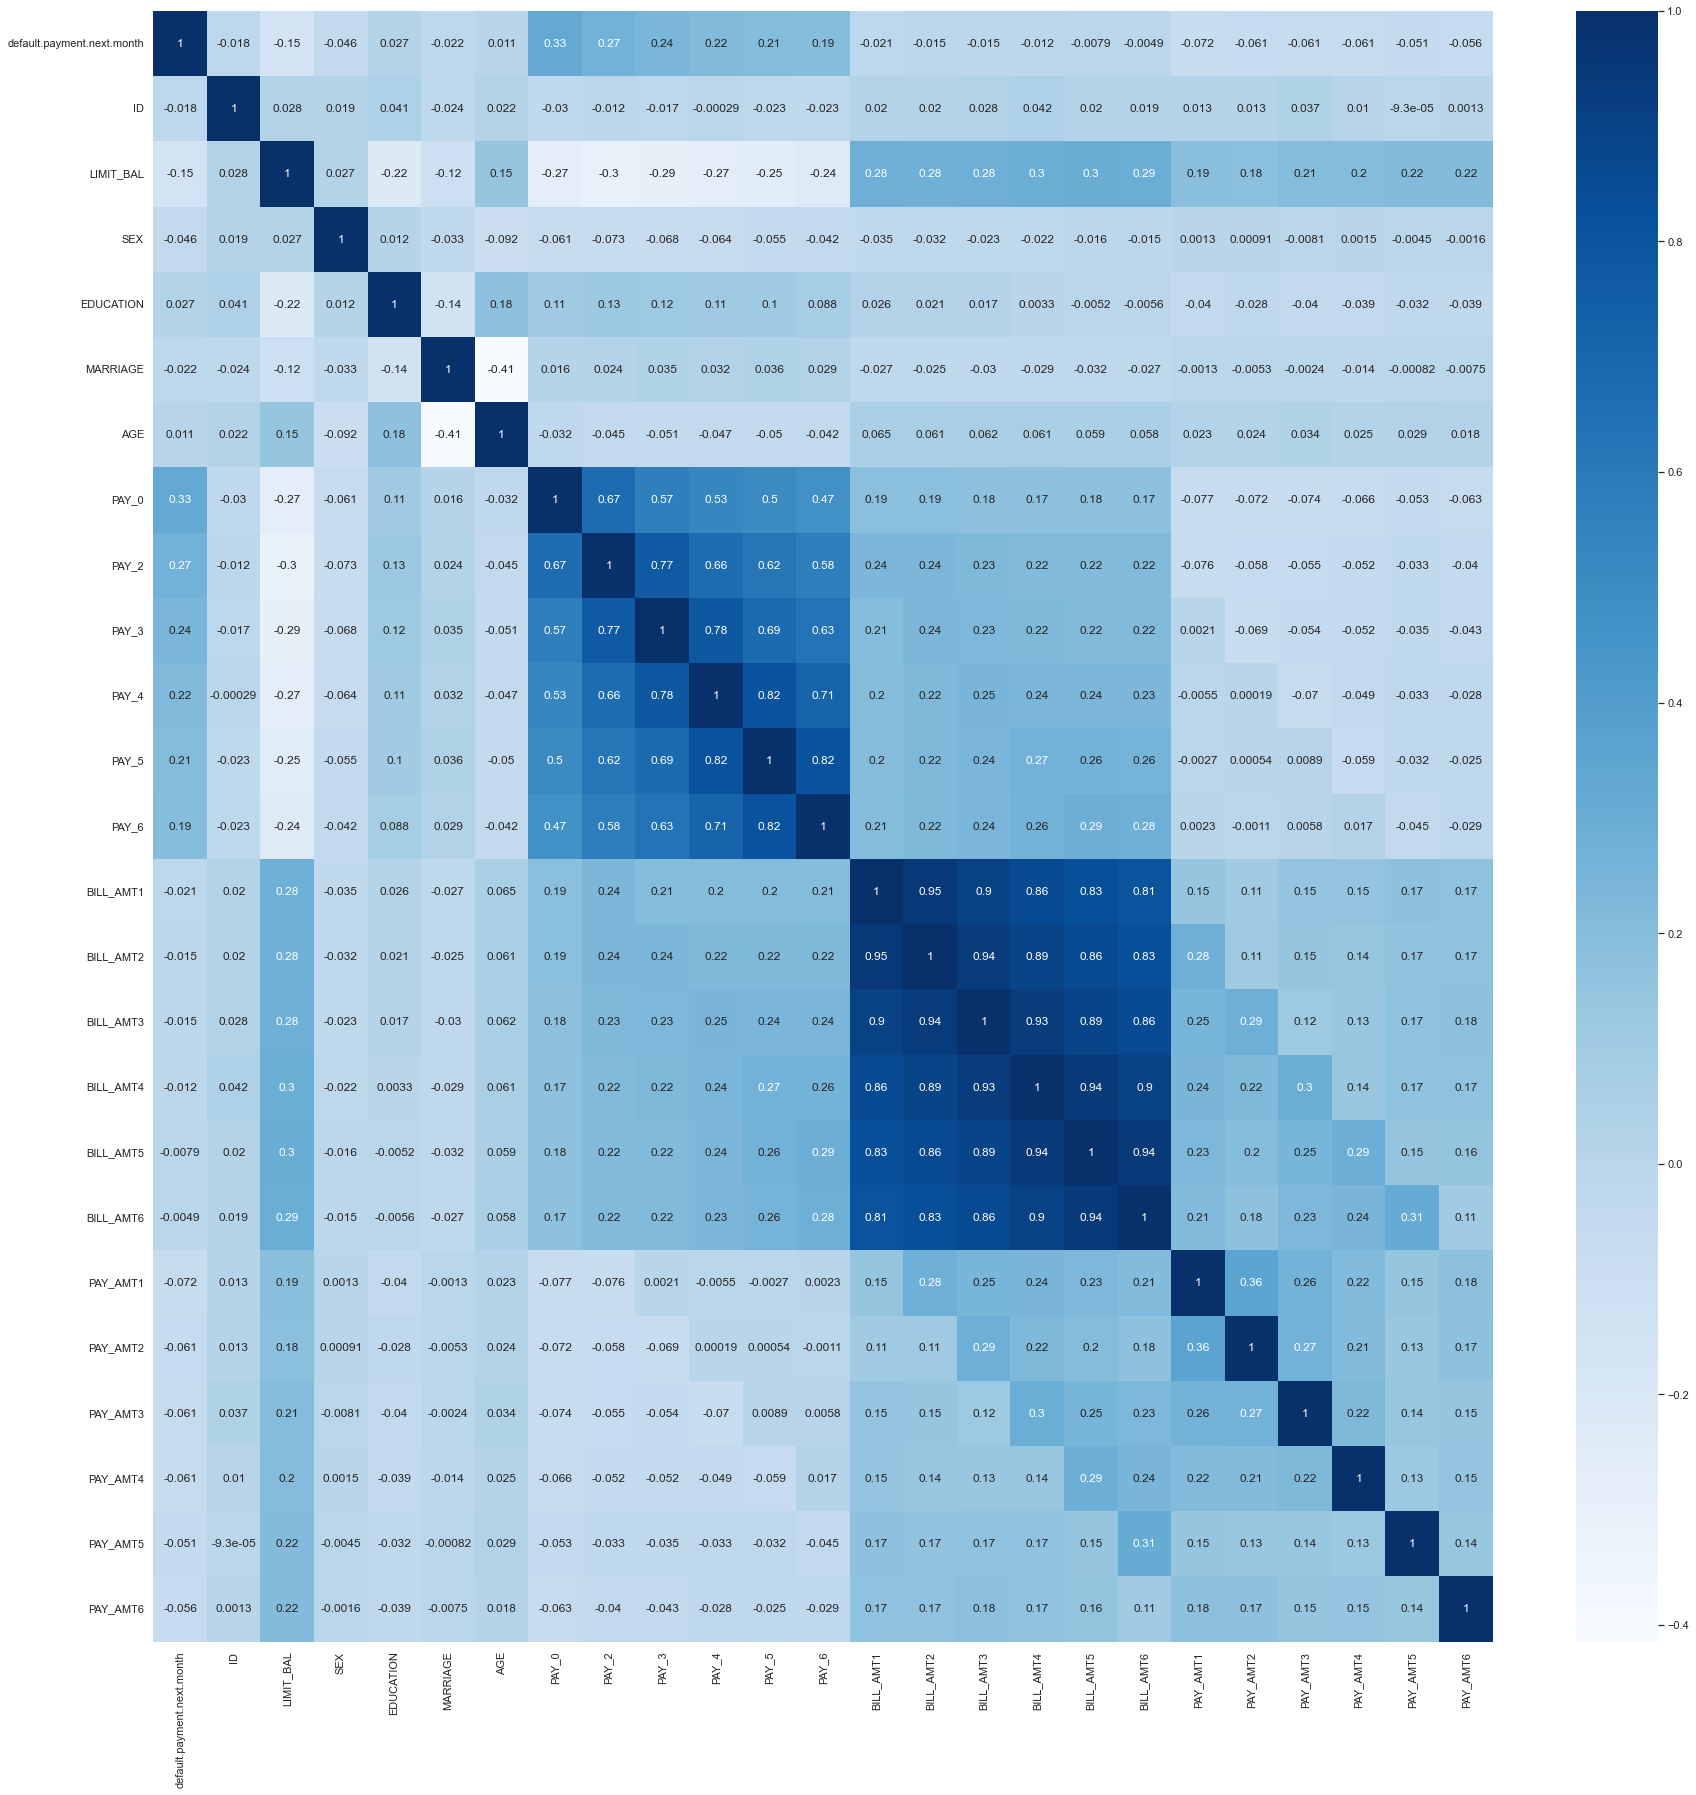

In [4]:
from IPython.display import Image

Image("plot_2.png")

We can summarize that basically all the PAY_X variables are highly correlated to the default possibility. This makes sense because all the PAY_X are directly report the repayment status in specific month. And the value of numbers reveals that how many months for that month’s payment delay. For example, PAY_2 records Repayment status in August, 2005, if a client get 7 for this variable means he/she has delayed this payment for 7 months already.

## 3. Predictive Modeling

Finally we get to the step of modeling.<br>

In order to compare and try various prediction models, our group tried different classifiers such as 
- logistic expression, 
- randomforestclassifier, 
- dummyclassifier,
- support vector machines (SVM REF). <br>
<br>And compared their respective precision and F1 scores, and the gap between their test_ score and train_ score

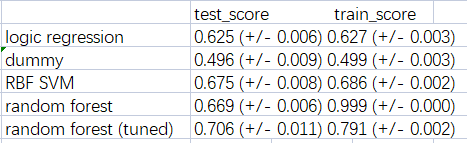

In [5]:
from IPython.display import Image

Image("plot_3.png")

After appropriate cross validation using scikit-learn, we get the test_ score and train_ score. <br>
(*The following model are with default hyperparameters. ) <br>
logistic expression,dummyclassifier,support vector machines' test and train split score all seems too close with each other, there's only a marginal difference. It implies that the classifier might build quite a simple model that hasn't catch the useful pattern of dataset.

Random forest seems to be the most appropriate classifier, however it still be possible to be overfitting. We can tuned with adjusting the  default hyperparameters.

In [ ]:
# example code
model2 = RandomForestClassifier(max_features=2, n_estimators=60)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
print( accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

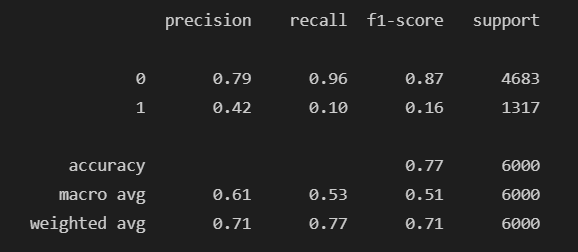

In [5]:
from IPython.display import Image

Image("plot_8.png")

The Model accuracy (using different measurement metrics) are shown above. 

The conclusion analysis is that since the dataset has many features  0,1 features or other features similar to  one-hot coding,random forest was one of the most effective algorithms that I chosen.

## Acknowledgements

Really apperciate for what I've learned this semester in CPSC330, thanks for professor [Varada Kolhatkar](https://kvarada.github.io/)'s patient teaching, thanks for all the TA teams' hardworking on reviewing homework! You're the best~